## Reading the data prepared from the 18 Archetypes - GetBoarded

<br>--- Importing the required libraries</br>


In [80]:
import pandas as pd
data=pd.read_csv("gb_types.csv")
data.head()

,Personality GB,Detail,Breif,Trait
0,Willing Risk Taker,"these brand archetypes, the 'willing risk take...",Comfortable\nworking in a changing and\nuncert...,ACCEPTS UNCERTAINTY. ADVENTUROUS & LIVES FOR E...
1,Skilled Communicator,Sharing wisdom with you with an ability to exp...,Clearly explains a point of view and its\nreas...,SHARING WISDOM WITH YOU WITH AN ABILITY TO EXP...
2,Practical Fixer,The go to person. Continuously improving and s...,Continuously looks for ways to improve\nproces...,THE GO TO PERSON. CONTINUOUSLY IMPROVING & SOL...
3,The Energetic Driver,Result oriented. Demonstrates a positive can d...,Consistently achieves results and meets goals\...,RESULT ORIENTED. DEMONSTRATES A POSITIVE CAN D...
4,The Flexible Character,Self aware. Adapts behaviour to the interperso...,Adapts\nbehavior to the interpersonal\nstyle a...,SELF AWARE. ADAPTS BEHAVIOUR TO THE INTERPERSO...


## Menu for the user to enter the types hes feels he can relate to

In [81]:
#Shows menu enter the number you think you are ..after you are done press -1
menu=data[['Personality GB','Trait']].copy()[:-1]
menu 


,Personality GB,Trait
0,Willing Risk Taker,ACCEPTS UNCERTAINTY. ADVENTUROUS & LIVES FOR E...
1,Skilled Communicator,SHARING WISDOM WITH YOU WITH AN ABILITY TO EXP...
2,Practical Fixer,THE GO TO PERSON. CONTINUOUSLY IMPROVING & SOL...
3,The Energetic Driver,RESULT ORIENTED. DEMONSTRATES A POSITIVE CAN D...
4,The Flexible Character,SELF AWARE. ADAPTS BEHAVIOUR TO THE INTERPERSO...
5,Calming Presence,"ELEGANT. PATIENT, HUMBLE & CALM UNDER PRESSURE"
6,Smooth Operator,"CONFIDENT, TACTFUL & KNOWS THE POLITICS OF REL..."
7,The Inspirational Cheerleader,"CONFIDENT, TACTFUL & KNOWS THE POLITICS OF REL..."
8,Sound Decision Maker,"EXPERIENCED, EXERCISES GOOD JUDGMENT WHEN MAKI..."
9,The Methodical Organizer,"GOALS, PLANS & ATTENTION TO DETAIL."


In [82]:
input_types=[]
flag=True
while(flag):
    x=int(input())
    if x==-1:
        flag=False
    else:
        input_types.append(x)
print(input_types)

1
16
17
-1
[1, 16, 17]


# Using the data from the big 5 - 32 types
 *For reference*  -- http://similarminds.com/sloan.html
<br><b>S</b>ocial or <b>R</b>eserved</br>
<br><b>L</b>imbic or <b>C</b>alm</br>
<br><b>O</b>rganized or <b>U</b>nstructured</br>
<br><b>A</b>ccommodating or <b>E</b>gocentric</br>
<br><b>N</b>on-curious or <b>I</b>nquisitive</br>

In [83]:
big_five_df=pd.read_csv("global_5_data_32_types.csv")
big_five_df.head()


,SR NO,Type,Keywords,Favored Careers,Disfavoured Careers
0,1,RCOAI,"not relationship obsessed, withdrawn, risk ave...","research scientist, scientist, biotechnology, ...","entertainer, fashion industry, stylist, movie ..."
1,2,RCOAN,"not spontaneous, unadventurous, uncompetitive,...","pediactric nurse, stay at home parent, persona...",NaN
2,3,RLOAN,"not spontaneous, prefers organized to unpredic...","home maker, stay at home parent, receptionist,...","\nmovie director, philosopher, entertainer, fi..."
3,4,RLOAI,"withdrawn, loner, not wild and crazy, does not...","researcher, scholar, research assistant, books...","entertainer, movie star, bar owner, athlete, r..."
4,5,RLUAI,"moody, not good at sports, low energy level, u...","philosophy professor, novelist, poet, philosop...","businessman, business manager, manager, athlet..."


## Cleaning the data and finding the similarity using NLP

In [84]:
# Program to measure similarity between  
# two sentences using cosine similarity. 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# Concatinating all input types of gb by user 
arc_type_1=""
for x in input_types:
    arc_type_1+=data['Detail'][x]
big_five_keys=big_five_df['Keywords']
index=0
score=[]
name=[]
dict_career={}
dict_n_career={}
for big_five_key in big_five_keys:
    # X = input("Enter fist string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =arc_type_1
    Y =big_five_key
    
    X=X.lower()
    Y=Y.lower()
    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    score.append(cosine)
    name.append(big_five_df['Type'][index])    
    dict_career[big_five_df['Type'][index]]=big_five_df['Favored Careers'][index]
    dict_n_career[big_five_df['Type'][index]]=big_five_df['Disfavoured Careers'][index]
    index=index+1

In [85]:
x=sorted(zip(score, name), reverse=True)[:8]
x

[(0.14922284076266623, 'SCUAN'),
 (0.1322385973614525, 'SCOAN\xa0'),
 (0.12489200861914959, 'SLUEI\xa0'),
 (0.12236867762727807, 'RCUEI\xa0'),
 (0.11754541987684666, 'SCOAI\xa0'),
 (0.1163397939564086, 'SCUAI\xa0'),
 (0.11381286340149636, 'SLUEN'),
 (0.11381286340149636, 'SCOEN\xa0')]

In [86]:
import math
import numpy as np
#Taking the union of the matching personality
set_1=set(dict_career[x[0][1]].split(","))
set_f=set()
for i in range(0,2):
    key=x[i][1]
    
    set_1=set(dict_career[key].split(","))    
    set_f=set_f.union(set_1)
    



#Removing the disfavored careers of the similar personality    
for i in range(0,8):    
    key=x[i][1]
    
    if dict_n_career[key] is np.nan:
        set_n_1=set()
    else:
        set_n_1=set(dict_n_career[key].split(","))
        
    set_f=set_f-set_f.intersection(set_n_1)
print(set_f)        

{' movie director', ' office worker', ' firefighter', ' athletic trainer', ' career in the music industry', ' youth pastor', ' performer', ' coach', ' counselor', ' musician', ' make up artist', ' elementary school teacher', ' customer service employee', ' career in the performing arts', ' flight attendant', ' social services worker', ' midwife', ' high school teacher', ' school counselor', ' youth minister', 'comedian', ' rock star', ' waiter', ' nanny', ' early childhood educator', ' bartender', ' home maker', ' interior designer', ' athlete', ' hair dresser', ' pediatric nurse', ' child psychologist', ' camera operator', ' police officer', ' photographer', ' nurse practitioner', ' stage manager', 'event planner', ' special education worker', ' career in the entertainment industry', ' singer', ' animal trainer', ' physical therapist', ' broadcaster', ' beautician', ' administrative assistant', ' public relations specialist', ' fundraiser', ' public relations manager', ' race car driv

## Vizualization of the career options

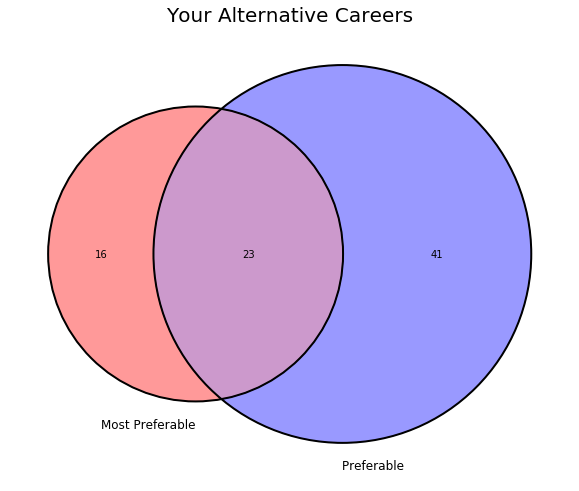

In [90]:
#Venn diagrams
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn_wordcloud import venn2_wordcloud
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Your Alternative Careers', fontsize=20)
v = venn2([set_1, set_f],
          set_labels=['Most Preferable', 'Preferable '])
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)
c = venn2_circles([set_1, set_f],
                  linestyle='solid')
plt.show()

Skilled Communicator
The Big Picture Thinker
The Imaginative Mind


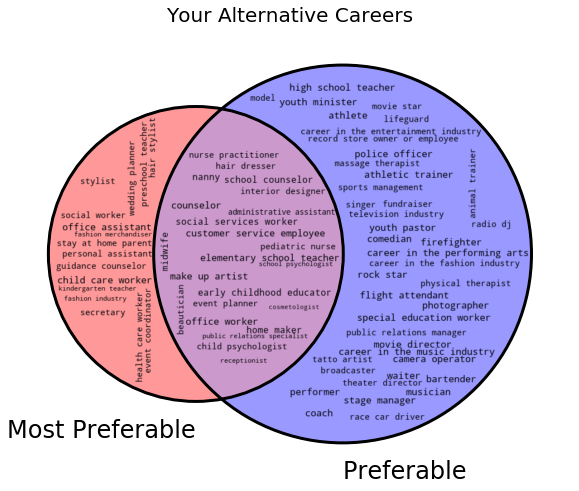

In [89]:
from matplotlib_venn_wordcloud import venn2_wordcloud
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Your Alternative Careers', fontsize=20)
v = venn2_wordcloud([set_1,set_f],
                    ax=ax, set_labels=['Most Preferable', 'Preferable '])
# add color
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('01').set_alpha(0.4)
v.get_patch_by_id('11').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)
for i in input_types:
    print(menu['Personality GB'][i])